## Problem definition

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient.

## Attribute Information:

age  

sex  (1 = male; 0 = female)

cp = chest pain type (4 values): 0: Typical angina: chest pain related decrease blood supply to the heart

1: Atypical angina: chest pain not related to heart

2: Non-anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease

trestbps = resting blood pressure

chol = serum cholestoral in mg/dl

fbs = fasting blood sugar > 120 mg/dl

restecg = resting electrocardiographic results (values 0,1,2)

thalach = maximum heart rate achieved

exang = exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

slope = the slope of the peak exercise ST segment (0-great heart rate during exercise,1-minimal change,2-signs of unhealthy heart)

ca = number of major vessels (0-3) colored by flourosopy

thal:thalium stress result(how well blood flows through your heart muscle while you're exercising or at rest.) (0-3) 

target: 0 = no disease, 1 = heart disease

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## LOADING THE DATA

In [3]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
#checking if there are missing values

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## EXPLORING THE DATA 

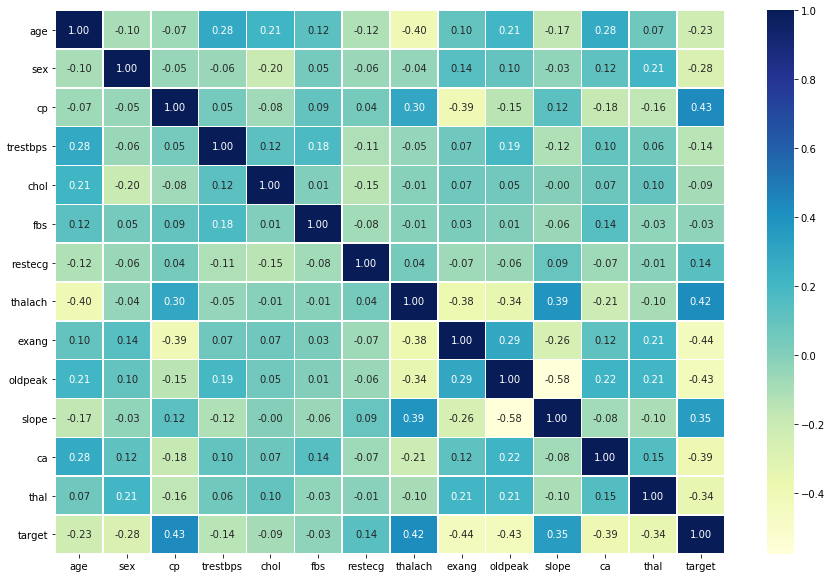

In [9]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

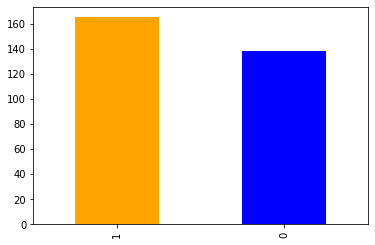

In [47]:
df['target'].value_counts().plot(kind="bar",color=["orange", "blue"])

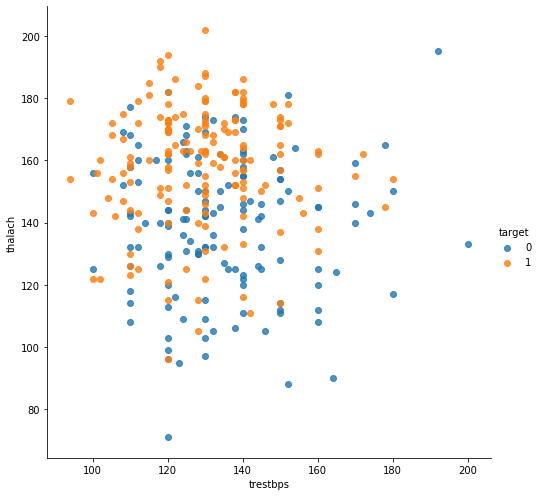

In [36]:
sns.lmplot(data=df,x='trestbps',y='thalach',hue='target',fit_reg=False,height=7)


Text(0.5, 0, '0 = no disease, 1 = disease')

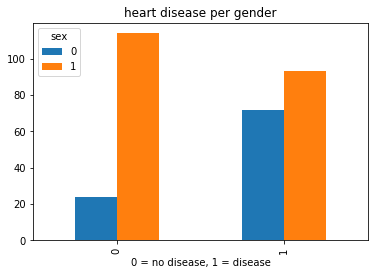

In [58]:
pd.crosstab(df.target,df.sex).plot(kind="bar")
plt.title('heart disease per gender')
plt.xlabel('0 = no disease, 1 = disease')

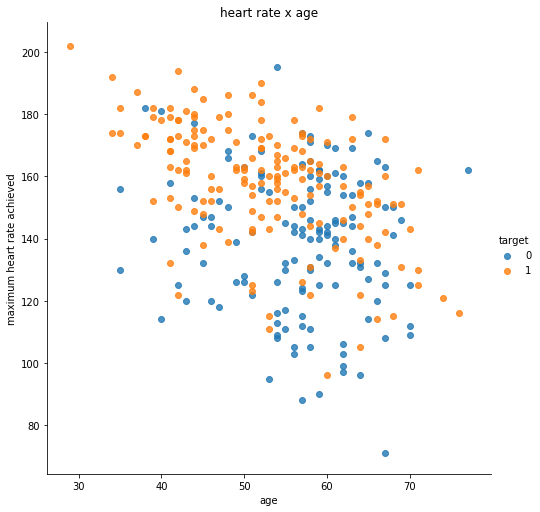

In [49]:
sns.lmplot(data=df,x='age',y='thalach',hue='target',fit_reg=False,height=7)
plt.ylabel('maximum heart rate achieved')
plt.title('heart rate x age')
plt.show()


Text(0.5, 0, 'types of chest pain')

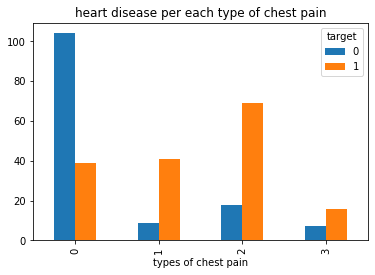

In [56]:
pd.crosstab(df.cp,df.target).plot(kind="bar")
plt.title('heart disease per each type of chest pain')
plt.xlabel('types of chest pain')

Text(0.5, 1.0, ' heart disease per thal condition')

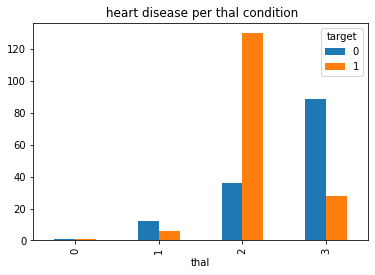

In [55]:
pd.crosstab(df.thal,df.target).plot(kind="bar")
plt.title(' heart disease per thal condition')


Text(0.5, 1.0, 'slope x disease')

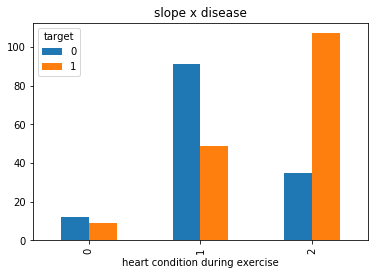

In [60]:
pd.crosstab(df.slope,df.target).plot(kind="bar")
plt.xlabel('heart condition during exercise')
plt.title('slope x disease')

## Splitting the data in train and test sets

In [61]:
X = df.drop(['target'],axis=1)
y = df['target']

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Finding the best parameters and fitting them

using the RandomizedSearchCV to find the best parameters and fitting them into a Random Forest Classifier algorithm.

In [65]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_grid = {"n_estimators": [300,900,1500], "max_depth": [None, 3, 6], "max_features": [0.5, 1, "auto"], "min_samples_split":[2, 5, 8], 'min_samples_leaf': [2, 6, 10]}
model = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1,random_state=42),param_distributions=rf_grid,n_iter=5,cv=5,verbose=True)
model.fit(X_train,y_train)
print(model.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   39.2s finished


{'n_estimators': 900, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None}


In [66]:
#making predictions
y_pred = model.predict(X_test)

## Evaluating our predictions with classification report and confusion matrix

In [67]:

from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      0.78      0.78        27
           1       0.82      0.82      0.82        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [68]:
print(confusion_matrix(y_test, y_pred))


[[21  6]
 [ 6 28]]
